# Projet Classification de données hyperspectrales

Les images hyperspectrales sont un type de données que vous avez déjà traitées dans un précédent TP, et qui correspondent à des images dont le contenu spectral est enrichi. L'objectif de ce mini-projet est une compétition (entre vous) pour la classification des pixels d'une image hyperspectrale.



Vous allez avoir à disposition une image hyperspectrale (survol de l'Université de pavie), et votre objectif est de déterminer automatiquement la nature des pixels qui composent l'image.

On commence par charger l'image et quelques imports utiles


In [1]:
import numpy as np
from scipy.io import loadmat
import pylab as pl

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras import optimizers

In [5]:
pavia = np.load('pavia.npy')

dont voici les dimensions


In [6]:
pavia.shape

(610, 340, 103)

Voici un aperçu de cette image (on choisit 3 bandes spectrales parmi les 103 pour simuler le bleu, vert et rouge)

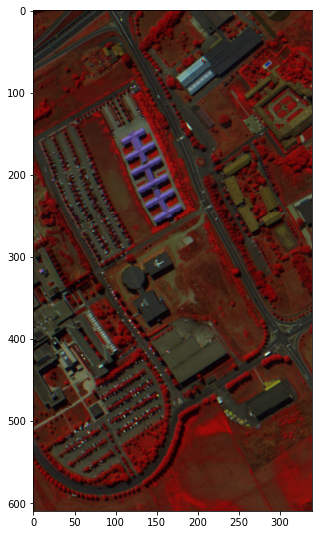

In [7]:
nbands=[100,50,10]

pl.figure(figsize=(5,10))
pl.imshow(pavia[:,:,nbands])
pl.show()

Je donne en plus de cette image une série de labels correspondant à la classe associée à certains pixels


(610, 340)


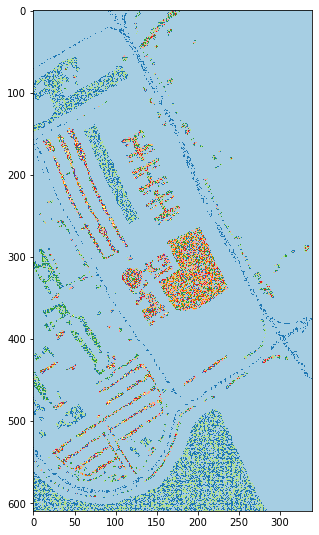

In [8]:
pavia_vt = np.load('train_set.npy')
print(pavia_vt.shape)
pl.figure(figsize=(5,10))
pl.imshow(pavia_vt,cmap='Paired')
pl.show()

Vous noterez que **la classe 0 correspond à tous les pixels à étiquetter**




L'objectif est que vous obteniez la classe de tous les autres pixels en utilisant un réseau de neurones que vous designerez selon votre choix. L'objectif est d'obtenir les meilleures performances sur ce jeu de données, aussi vous penserez à découper votre jeu de données d'entrainement en jeux de train/validation. Je vous laisse toute latitude sur ces choix. 



En plus du notebook contenant votre code, vous me remettrez un fichier dont la structure est équivalente à celle de 'train_set.npy', contenant une des 9 neufs classes numérotées de 1 à 9 **pour chaque pixel**  (un espace de rendu sera disponible dans l'ENT).

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(pavia,pavia_vt,test_size=0.15)

In [10]:
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

tab1 = np.argwhere(Y_train!=0)
x_train_trie = np.array([X_train[i[0]][i[1]] for i in tab1])
y_train_trie = keras.utils.to_categorical([Y_train[i[0]][i[1]] for i in tab1])


tab2 = np.argwhere(Y_test!=0)
x_test_trie = np.array([X_test[i[0]][i[1]] for i in tab2])
y_test_trie = keras.utils.to_categorical([Y_test[i[0]][i[1]] for i in tab2])

(92, 340, 103)
(518, 340, 103)
(518, 340)
(92, 340)


## Le reseau de neurone

### Model

In [11]:
N = x_train_trie.shape[1]
H = 100 # couche cachee
K = 10 #couche sortie

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(100))
model.add(Activation("swish"))
model.add(Dense(100))
model.add(Activation("swish"))
model.add(Dense(100))
model.add(Activation("swish"))
model.add(Dense(K))
model.add(Activation("softmax"))

### Entrainement

In [12]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_trie, y_train_trie, epochs=200, batch_size=32) # batch_size nb sample qu'on passe
model.fit(x_train_trie, y_train_trie, epochs=500, batch_size=500) # batch_size nb sample qu'on passe

Epoch 1/200
565/565 [==============================] - 1s 2ms/step - loss: 1.2229 - accuracy: 0.7114
Epoch 2/200
565/565 [==============================] - 1s 2ms/step - loss: 0.5571 - accuracy: 0.7855
Epoch 3/200
565/565 [==============================] - 1s 2ms/step - loss: 0.4895 - accuracy: 0.8127
Epoch 4/200
565/565 [==============================] - 1s 2ms/step - loss: 0.4457 - accuracy: 0.8326
Epoch 5/200
565/565 [==============================] - 1s 2ms/step - loss: 0.4060 - accuracy: 0.8487
Epoch 6/200
565/565 [==============================] - 1s 2ms/step - loss: 0.3855 - accuracy: 0.8565
Epoch 7/200
565/565 [==============================] - 1s 2ms/step - loss: 0.3689 - accuracy: 0.8651
Epoch 8/200
565/565 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8720
Epoch 9/200
565/565 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8740
Epoch 10/200
565/565 [==============================] - 1s 2ms/step - loss: 0.3223 - accura

### Prediction
Attendu 0.9 pour train <br>
Meilleur résultat : 0.8598

In [13]:
results = model.evaluate(x_test_trie, y_test_trie, batch_size=256)

13/13 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9619


In [14]:
predictions = model.predict(pavia)

print(predictions.shape)

tab = []
m,d,u = predictions.shape
for i in range(m):
  colonne = []
  for j in range(d):
    colonne.append(np.argmax(predictions[i][j]))
  tab.append(colonne)
tab = np.asarray(tab)

(610, 340, 10)


### Affichage

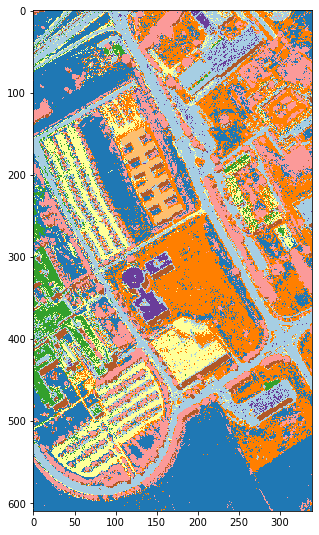

In [15]:
pl.figure(figsize=(5,10))
pl.imshow(tab,cmap='Paired', interpolation='nearest')
pl.show()

### Ecriture fichier


In [16]:
np.save('Samuel_LEBERRE.npy', tab)